 # **<span style="font-size:larger;"> 03: <span style="color:blue">Model Selection & Evaluation</span>** #

#### Imports and Read-Ins:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier
import pickle

import warnings
warnings.filterwarnings("ignore")

In [2]:
import random
random.seed(42)

In [3]:
df = pd.read_csv('../data/url_updated.csv')

# I. Model Setup

### Baseline

In [4]:
df['phishing'].value_counts(normalize=True)

0    0.720935
1    0.279065
Name: phishing, dtype: float64

### Train Test Split

In [4]:
X = df.drop(columns=['url', 'protocol', 'domain', 'path', 'query', 'fragment','phishing'])

y = df['phishing']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42, stratify = y )

### Scale Data

In [6]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)

X_test_sc = ss.transform(X_test)

# II. Model Selection

We will run a single model for each of the following 9 classifiers:

- Stochastic Gradient Descent Classifier
- Logistic Regression
- AdaBoost
- Gradient Boost
- Decision Tree Classifier
- Bagging Classifier
- K-Nearest Neighbors Classifier
- Extra Trees Classifier
- Random Forest Classifier

Two functions are built to help aid our model selection process. One for scaled data and one for unscaled data.

In [7]:
def get_scores_sc(model):
    
    # instantiate model
    model = model()
    
    # fit to scaled data
    model.fit(X_train_sc, y_train)
    
    # make predictions
    preds = model.predict(X_test_sc)

    # print results
    print(f'{model} Training Score: {model.score(X_train_sc, y_train)}')
    print(f'{model} Testing Score: {model.score(X_test_sc, y_test)}')
    print()
    print(classification_report(y_test, preds))
    print(confusion_matrix(y_test, preds))

    return

In [8]:
def get_scores(model):
    
    # instantiate model
    model = model()
    
    # fit to data
    model.fit(X_train, y_train)
    
    # make predictions
    preds = model.predict(X_test)

    # print results
    print(f'{model} Training Score: {model.score(X_train, y_train)}')
    print(f'{model} Testing Score: {model.score(X_test, y_test)}')
    print()
    print(classification_report(y_test, preds))
    print(confusion_matrix(y_test, preds))

    return

In [9]:
get_scores_sc(SGDClassifier)

SGDClassifier() Training Score: 0.8677522647836823
SGDClassifier() Testing Score: 0.8676671014259126

              precision    recall  f1-score   support

           0       0.86      0.98      0.91     98389
           1       0.91      0.58      0.71     38085

    accuracy                           0.87    136474
   macro avg       0.89      0.78      0.81    136474
weighted avg       0.87      0.87      0.86    136474

[[96287  2102]
 [15958 22127]]


In [10]:
get_scores(AdaBoostClassifier)

AdaBoostClassifier() Training Score: 0.890550313735739
AdaBoostClassifier() Testing Score: 0.8911953925289798

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     98389
           1       0.92      0.67      0.78     38085

    accuracy                           0.89    136474
   macro avg       0.90      0.82      0.85    136474
weighted avg       0.89      0.89      0.89    136474

[[96051  2338]
 [12511 25574]]


In [11]:
get_scores(GradientBoostingClassifier)

GradientBoostingClassifier() Training Score: 0.89645377252266
GradientBoostingClassifier() Testing Score: 0.8977680730395533

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     98389
           1       0.93      0.69      0.79     38085

    accuracy                           0.90    136474
   macro avg       0.91      0.83      0.86    136474
weighted avg       0.90      0.90      0.89    136474

[[96284  2105]
 [11847 26238]]


In [10]:
get_scores_sc(LogisticRegression)

LogisticRegression() Training Score: 0.9251210856306833
LogisticRegression() Testing Score: 0.9244911118601346

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     98389
           1       0.97      0.75      0.85     38085

    accuracy                           0.92    136474
   macro avg       0.94      0.87      0.90    136474
weighted avg       0.93      0.92      0.92    136474

[[97435   954]
 [ 9351 28734]]


In [9]:
get_scores_sc(KNeighborsClassifier)

KNeighborsClassifier() Training Score: 0.9475894006413936
KNeighborsClassifier() Testing Score: 0.9316866216275628

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     98389
           1       0.92      0.83      0.87     38085

    accuracy                           0.93    136474
   macro avg       0.93      0.90      0.91    136474
weighted avg       0.93      0.93      0.93    136474

[[95474  2915]
 [ 6408 31677]]


In [12]:
get_scores(DecisionTreeClassifier)

DecisionTreeClassifier() Training Score: 0.9790655584349606
DecisionTreeClassifier() Testing Score: 0.9397687471606313

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     98389
           1       0.92      0.85      0.89     38085

    accuracy                           0.94    136474
   macro avg       0.93      0.91      0.92    136474
weighted avg       0.94      0.94      0.94    136474

[[95736  2653]
 [ 5567 32518]]


In [13]:
get_scores(BaggingClassifier)

BaggingClassifier() Training Score: 0.9759098824925933
BaggingClassifier() Testing Score: 0.9426703987572724

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     98389
           1       0.94      0.85      0.89     38085

    accuracy                           0.94    136474
   macro avg       0.94      0.92      0.93    136474
weighted avg       0.94      0.94      0.94    136474

[[96158  2231]
 [ 5593 32492]]


In [9]:
get_scores(ExtraTreesClassifier)

ExtraTreesClassifier() Training Score: 0.9790655584349606
ExtraTreesClassifier() Testing Score: 0.9435643419259346

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     98389
           1       0.93      0.86      0.89     38085

    accuracy                           0.94    136474
   macro avg       0.94      0.92      0.93    136474
weighted avg       0.94      0.94      0.94    136474

[[96078  2311]
 [ 5391 32694]]


In [10]:
get_scores(RandomForestClassifier)

RandomForestClassifier() Training Score: 0.9790460186458437
RandomForestClassifier() Testing Score: 0.9448906018728842

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     98389
           1       0.94      0.86      0.90     38085

    accuracy                           0.94    136474
   macro avg       0.94      0.92      0.93    136474
weighted avg       0.94      0.94      0.94    136474

[[96148  2241]
 [ 5280 32805]]


Random Forest Classifier will be used for model deployment as it had the highest testing score, as well as the highest recall score.

# III. Model Optimization

Using `RandomizedSearchCV`, we are able to find the best parameters for the model.

In [17]:
rfc = RandomForestClassifier()
rfc_params = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600]}

rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = rfc_params, cv = 3, verbose=2, random_state=42, 
                                n_jobs = -1)
rfc_random.fit(X_train, y_train)
print(f'Best Parameters: {rfc_random.best_params_}')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': True}


Training Score: 0.9696718048170465
Testing Score: 0.9442238081978985

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     98389
           1       0.94      0.86      0.90     38085

    accuracy                           0.94    136474
   macro avg       0.94      0.92      0.93    136474
weighted avg       0.94      0.94      0.94    136474

[[96170  2219]
 [ 5393 32692]]


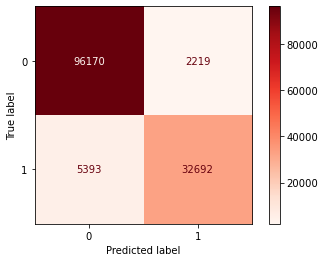

In [5]:
rfc = RandomForestClassifier(n_estimators = 1400, min_samples_split= 5, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 90, 
                             bootstrap= True, n_jobs= -1, random_state=42)
rfc.fit(X_train, y_train)

preds = rfc.predict(X_test)
print(f'Training Score: {rfc.score(X_train, y_train)}')
print(f'Testing Score: {rfc.score(X_test, y_test)}')
print()
print(classification_report(y_test,preds))
print(confusion_matrix(y_test, preds))

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rfc.classes_)
disp.plot(cmap = 'Reds', values_format='');

In [7]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

print("Accuracy: ", (tn + tp) / (tn + fp + fn + tp))
print('Misclassification Rate: ', (fp+fn)/(tp+fp+tn+fn))
print("Recall: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))
print("Precision: ", tp / (tp + fp))

Accuracy:  0.9442238081978985
Misclassification Rate:  0.0557761918021015
Recall:  0.8583956938427202
Specificity:  0.9774466657858094
Precision:  0.9364383718598722


### Pickeling Model

We will pickel this model in order to use for deployment.

In [19]:
pickle.dump(rfc, open('../streamlit_app/rfc.pkl','wb'))

# IV. Closer Look

A closer look into the importance of each feature can be analyzed.

In [11]:
# Create feature list
feature_list = list(X.columns)

# Get numerical feature importances
importances = list(rfc.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: qty_dot_domain       Importance: 0.278
Variable: url_length           Importance: 0.127
Variable: qty_dot_url          Importance: 0.123
Variable: domain_length        Importance: 0.112
Variable: path_length          Importance: 0.091
Variable: qty_dot_path         Importance: 0.047
Variable: query_length         Importance: 0.031
Variable: qty_slash_url        Importance: 0.03
Variable: qty_hyphen_path      Importance: 0.024
Variable: qty_slash_path       Importance: 0.024
Variable: qty_dot_query        Importance: 0.017
Variable: qty_hyphen_url       Importance: 0.016
Variable: qty_hyphen_domain    Importance: 0.013
Variable: qty_equal_url        Importance: 0.009
Variable: qty_questionmark_url Importance: 0.007
Variable: qty_and_url          Importance: 0.006
Variable: qty_equal_path       Importance: 0.006
Variable: qty_equal_query      Importance: 0.006
Variable: qty_slash_query      Importance: 0.004
Variable: qty_and_query        Importance: 0.004
Variable: qty_plus_ur